# CME + Flare Locations

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sunpy.map
import astropy.units as u
import sunpy.coordinates
from sunpy.coordinates import frames

from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.time import Time

In [2]:
# Defining the path for the dataframe
dataframe = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe 
df = pd.read_pickle(dataframe)

In [3]:
# Gathering the CME, Flare, and Sunspot properties
cme = df[['cme_time', 'cme_angle', 'cme_speed', 'cme_halo']]
fls = df[['flare_peak_time', 'flare_string_latlon', 'goes_flux']]
spts = df[['smart_observation_time', 'smart_string_latlon', 'smart_total_area', 'smart_total_flux']]

# Removing the rows containing any NaN values
cme = cme.dropna(how='any')
fls = fls.dropna(how='any')
spts = spts.dropna(how='any')

# Re-organising the indices
cme = cme.reset_index(drop=True)
fls = fls.reset_index(drop=True)
spts = spts.reset_index(drop=True)

# The coordinate systems
hg = df[['flare_hg_latitude', 'flare_hg_longitude']]
hg = hg.dropna(how='any')
hg = hg.reset_index(drop=True)

hc = df[['flare_hcx_position', 'flare_hcy_position']]
hc = hc.dropna(how='any')
hc = hc.reset_index(drop=True)

In [4]:
sample_map = 'C:/Users/Peter/py_projects/solar_stats/aia_sample.fits' 

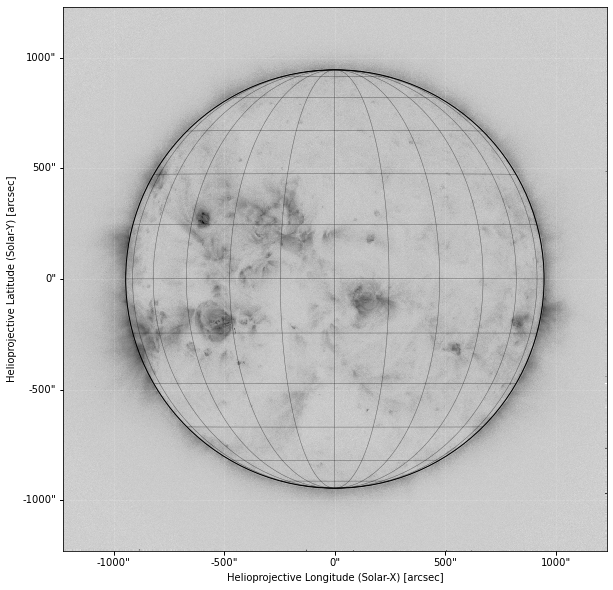

In [5]:
# Loading a sample map
sun = sunpy.map.Map(sample_map)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection=sun)
sun.plot(cmap='Greys')
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)

plt.show()

In [6]:
# Need to convert the latitudes and longitudes into the correct format
hg_arc = SkyCoord(hg.flare_hg_longitude*u.deg, hg.flare_hg_latitude*u.deg, frame=frames.Helioprojective)

In [7]:
hg_arc

<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=None): (Tx, Ty) in arcsec
    [( 216000.,  -14400.), ( 302400.,  -10800.), (  10800.,  -46800.), ...,
     (   3600.,   18000.), (-190800., -100800.), (-316800.,  -86400.)]>

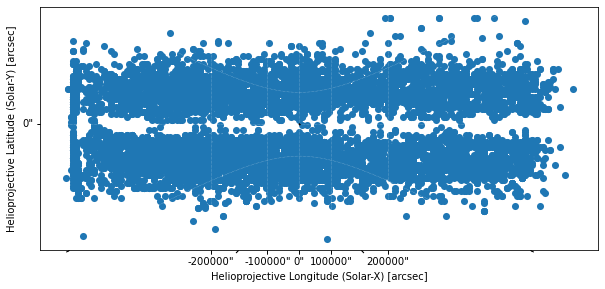

In [8]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection=sun)
sun.plot(title='', cmap='Greys')
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)
plt.scatter(hg_arc.Tx, hg_arc.Ty, s=50, cmap='viridis', linewidth=0.0)

plt.show()

In [9]:
# The scale of my map is too small. Looking at the heliocentric location columns to compare
hc_arc = SkyCoord(hc.flare_hcx_position*u.arcsecond, hc.flare_hcy_position*u.arcsecond, frame=frames.Helioprojective)

In [10]:
# Confirming that skycoords isn't doing anything funky..
print(max(hc_arc.Tx))
print(min(hc_arc.Tx))
print(max(hc_arc.Ty))
print(min(hc_arc.Ty))
print('')
print(max(hc.flare_hcx_position))
print(min(hc.flare_hcx_position))
print(max(hc.flare_hcy_position))
print(min(hc.flare_hcy_position))

1209.83arcsec
-1252.05arcsec
584.82arcsec
-614.3arcsec

1209.83
-1252.05
584.82
-614.3


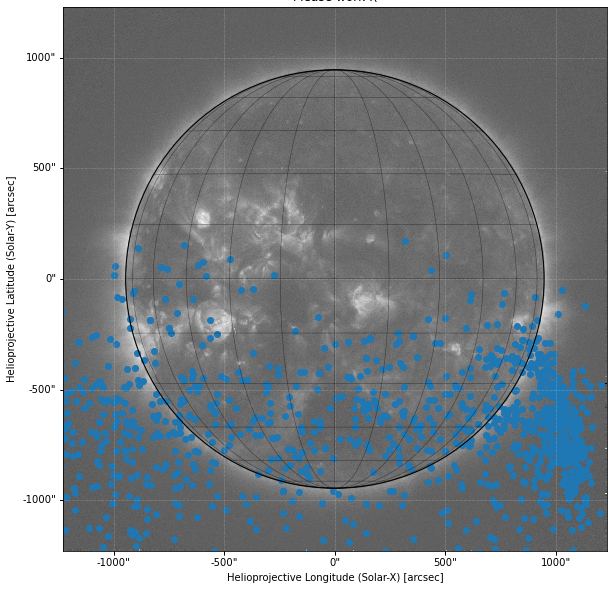

In [11]:
# Plotting using the hc columns
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection=sun)
sun.plot(title='Please work :(', cmap='Greys_r')
sun.data[:,:]=[500.]
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)

plt.scatter(hc.flare_hcx_position, hc.flare_hcy_position, s=50, cmap='viridis', linewidth=0.0)
#plt.scatter(cords.Tx, cords.Ty, s=50, cmap='viridis', linewidth=0.0)

ax.set_autoscale_on(False)

plt.show()

C:\Users\Peter\anaconda3\lib\site-packages\sunpy\map\mapbase.py:290: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gray"))
  cmap.set_bad(color='red')
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\stretch.py:415: RuntimeWarning: invalid value encountered in true_divide
  self.data = (self.data - vmin) / (vmax - vmin)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,94.0 Angstrom
Wavelength,94.0 Angstrom
Observation Date,2014-06-06 00:00:01
Exposure Time,2.902057 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.4 2.4] arcsec / pix
Reference Pixel,[511.5 511.5] pix

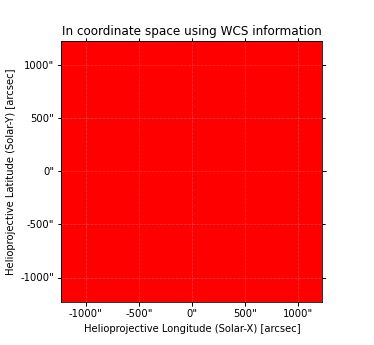
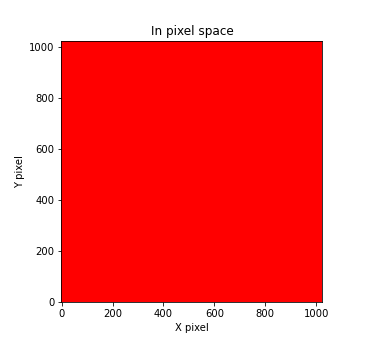
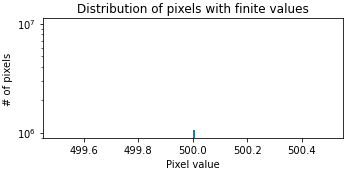

In [12]:
sun

In [13]:
# Going to try converting to arcsec and using the sun map's frame of reference
coords_arc = SkyCoord((hc.flare_hcx_position)*u.arcsec, (hc.flare_hcy_position)*u.arcsec, frame=sun.coordinate_frame)

In [14]:
coords_arc

<SkyCoord (Helioprojective: obstime=2014-06-06T00:00:01.120, rsun=696000000.0 m, observer=<HeliographicStonyhurst Coordinate (obstime=2014-06-06T00:00:01.120): (lon, lat, radius) in (deg, deg, m)
    (0.06692076, -0.094685, 1.51786249e+11)>): (Tx, Ty) in arcsec
    [( -137.61, -197.14), (   -5.98, -198.9 ), (  936.44, -132.05), ...,
     (  909.76,  135.66), (  966.77,  184.46), (-1153.91, -148.63)]>

C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


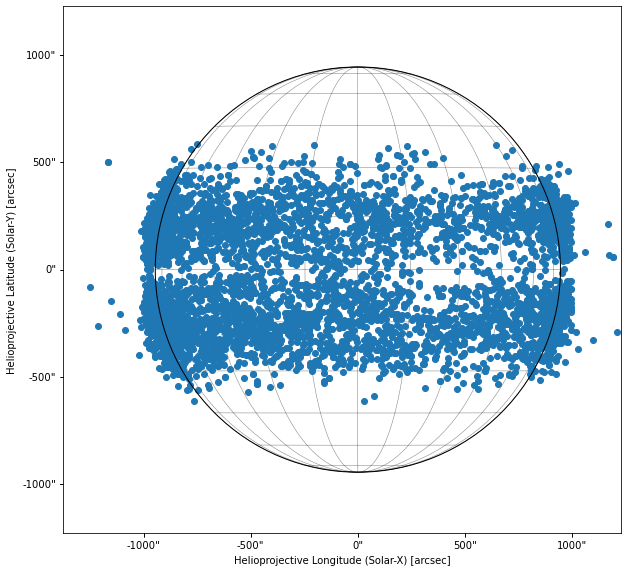

In [15]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection=sun)

sun.plot(cmap='Greys_r')
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)

ax.plot_coord(coords_arc, 'o')

plt.show()

C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


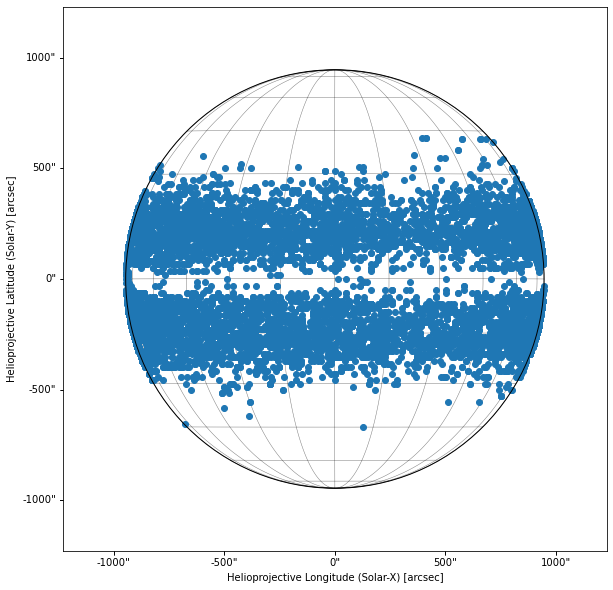

In [16]:
# Not sure why that didn't work. I think it's confusing the plot_coords procedure. 

# Trying the HeliographicStonyhurst frame of reference --> https://docs.sunpy.org/en/stable/code_ref/coordinates/index.html
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection=sun)

sun.plot(cmap='Blues')
sun.data[:,:]=[500.]
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)
ax.set_autoscale_on(False)

c = SkyCoord(hg.flare_hg_longitude*u.deg, hg.flare_hg_latitude*u.deg, frame=frames.HeliographicStonyhurst)
ax.plot_coord(c, 'o')

### Trying circle plot with a scatter

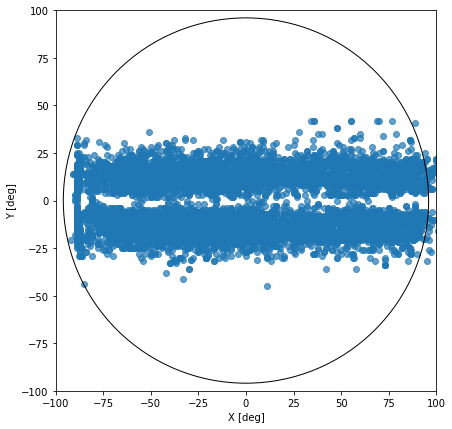

In [17]:
# Circle plot in degrees
fig = plt.figure(figsize=[7,7])

plt.scatter(c.lon, c.lat, alpha=0.7)
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('X [deg]')
plt.ylabel('Y [deg]')

circ = plt.Circle((0, 0), 96, color='k', fill=False)
plt.gca().add_artist(circ)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

#### Not getting the right spread

In [18]:
sb = df[['flare_peak_time', 'flare_hg_latitude', 'flare_hg_longitude', 'smart_total_area']]
sb = sb.dropna(how='any')
sb = sb.reset_index(drop=True)

Text(0, 0.5, 'Y (degree)')

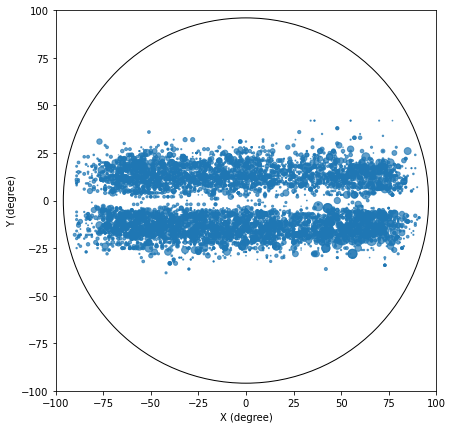

In [19]:
# Adding the different flare sizes
fig = plt.figure(figsize=[7,7])
circ = plt.Circle((0, 0), 96, color='k', fill=False)
plt.scatter(sb.flare_hg_longitude, sb.flare_hg_latitude, s=10*sb.smart_total_area/sb.smart_total_area.mean(),
            alpha=0.7)
plt.xlim(-100, 100)
plt.ylim(-100, 100)
ax = plt.gca()
ax.add_artist(circ)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X (degree)')
plt.ylabel('Y (degree)')

#### Still not the right spread --> the points are not wrapping correctly

In [20]:
print(max(sb.flare_hg_latitude))
print(min(sb.flare_hg_latitude))
print(max(sb.flare_hg_longitude))
print(max(sb.flare_hg_longitude))

42
-38
91
91


So far, using **c = SkyCoord(hg.flare_hg_longitude*u.deg, hg.flare_hg_latitude*u.deg, frame=frames.HeliographicStonyhurst)** and **ax.plot_coord(c)** is working best, but no scatter properties can be used with this

# Scatter attempt 23/11

In [49]:
# Cartopy
import cartopy.crs as ccrs

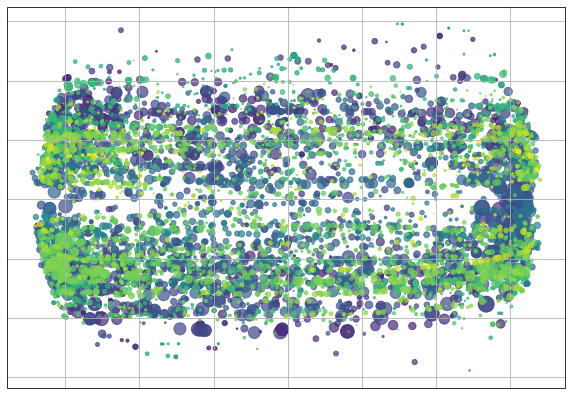

In [62]:
fig = plt.figure(figsize=[10,10])
ortho = ccrs.Orthographic(central_longitude=0, central_latitude=0)
ax = plt.axes(projection=ortho)
ax.gridlines()
ax.scatter(smt['smart_hcx_position'], smt['smart_hcy_position'], s=spt_size, c=smt['smart_observation_time'], alpha=0.7)

In [25]:
min_hx = min(hc['flare_hcx_position'])
max_hx = max(hc['flare_hcx_position'])

min_hy = min(hc['flare_hcy_position'])
max_hy = max(hc['flare_hcy_position'])

Text(0, 0.5, 'Y (arcsec)')

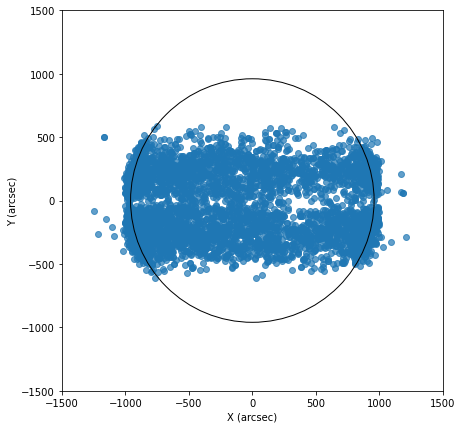

In [29]:
fig = plt.figure(figsize=[7,7])
circ = plt.Circle((0, 0), 960, color='k', fill=False)
plt.scatter(hc['flare_hcx_position'], hc['flare_hcy_position'], alpha=0.7)

plt.xlim(-1500, 1500)
plt.ylim(-1500, 1500)

#plt.xlim(min_hx, max_hx)
#plt.ylim(min_hy, max_hy)

ax = plt.gca()
ax.add_artist(circ)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X (arcsec)')
plt.ylabel('Y (arcsec)')

In [35]:
# SMART props
smt = df[['smart_observation_time', 'smart_string_latlon',
          'smart_hg_latitude', 'smart_hg_longitude',
          'smart_hcx_position', 'smart_hcy_position',
          'smart_total_area']]

smt = smt.dropna(how='any')
smt = smt.reset_index(drop=True)

In [101]:
# Marker sizes to indicate sunspot area
spt_size = 30*smt.smart_total_area/smt.smart_total_area.mean()

# Colours to indicate date


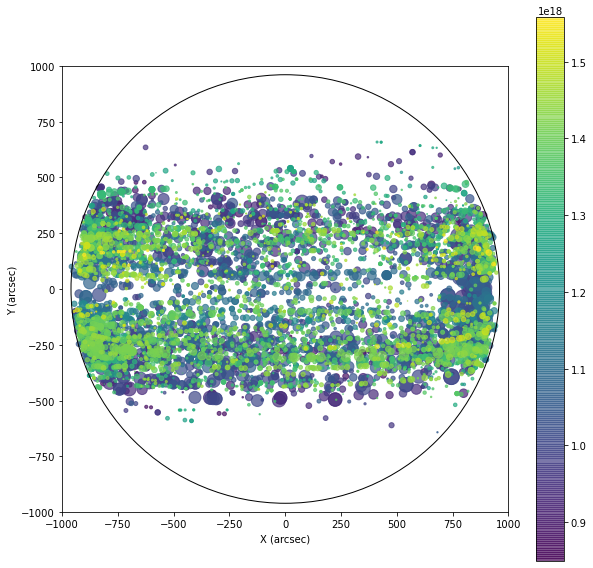

In [149]:
fig = plt.figure(figsize=[10,10])
circ = plt.Circle((0, 0), 960, color='k', fill=False)
plt.scatter(smt['smart_hcx_position'], smt['smart_hcy_position'], s=spt_size, c=smt['smart_observation_time'], alpha=0.7)

plt.xlim(-1000, 1000)
plt.ylim(-1000, 1000)

ax = plt.gca()
ax.add_artist(circ)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X (arcsec)')
plt.ylabel('Y (arcsec)')
plt.colorbar()

In [143]:
# Converting coords
flares = df[['flare_peak_time', 'flare_hcx_position', 'flare_hcy_position', 'goes_flux']]
flares = flares.dropna(how='any')
flares = flares.reset_index(drop=True)

In [144]:
#FLARES
lons_f = (flares['flare_hcx_position'].values*u.arcsec).to(u.deg)
lats_f = (flares['flare_hcy_position'].values*u.arcsec).to(u.deg)
#size_f = 30*np.log10(flares.goes_flux)/np.log10(flares.goes_flux.mean())
size_f = 30*flares.goes_flux/flares.goes_flux.mean()

#SMART
lons_s = (smt['smart_hcx_position'].values*u.arcsec).to(u.deg)
lats_s = (smt['smart_hcy_position'].values*u.arcsec).to(u.deg)
size_s = 30*smt.smart_total_area/smt.smart_total_area.mean()

In [208]:
smt['smart_observation_time']

0      1996-11-30 20:48:00
1      1996-12-19 01:39:00
2      1996-12-19 16:00:00
3      1996-12-23 19:15:00
4      1997-04-01 11:15:00
               ...        
6676   2019-05-06 19:58:00
6677   2019-05-07 01:58:00
6678   2019-05-07 11:58:00
6679   2019-05-07 11:58:00
6680   2019-05-16 04:58:00
Name: smart_observation_time, Length: 6681, dtype: datetime64[ns]

In [240]:
smt['smart_observation_time'].iloc[2731]

Timestamp('2008-01-30 17:39:00')

In [201]:
import datetime as dt

In [260]:
spt_dates = smt['smart_observation_time'].values.astype(float)

In [261]:
spt_dates[3340]

1.31787348e+18

C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - sel

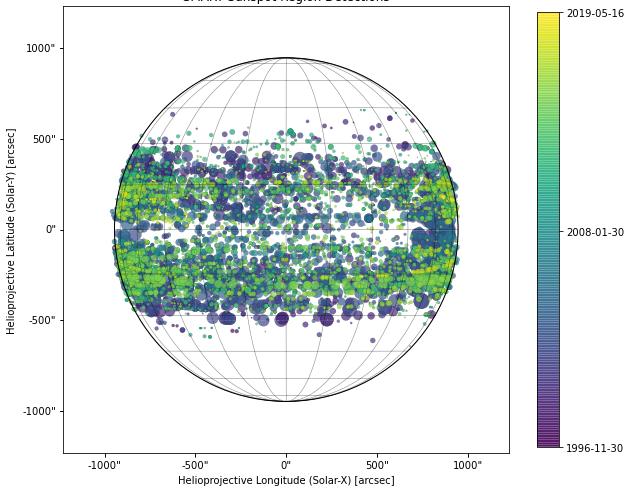

In [264]:
# Going to try with the sunmap
fig = plt.figure(figsize=[10,10], facecolor='white')
ax = fig.add_subplot(projection=sun)

sun.plot(cmap='Blues')
sun.data[:,:]=[500.]
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)
ax.set_autoscale_on(False)
ax.set_title('SMART Sunspot Region Detections')

sct = ax.scatter(lons_s, lats_s, s=size_s, edgecolor='k', lw=0.1,
                 c=test, alpha=0.7, transform=ax.get_transform('world'))

#cbar = plt.colorbar(sct)
cbar = fig.colorbar(sct, orientation='vertical', shrink=0.8, ticks=[min(spt_dates), spt_dates[2731], max(spt_dates)])
cbar.ax.set_yticklabels(['1996-11-30', '2008-01-30', '2019-05-16'])

#plt.savefig('smart_locations.png', dpi=300, bbox_inches="tight", pad_inches=1)

In [257]:
flares['flare_peak_time'].iloc[247]

Timestamp('2009-10-31 15:15:30')

In [245]:
flare_dates = flares['flare_peak_time'].values.astype(float)

In [249]:
flare_dates[200]

1.126443426e+18

C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - sel

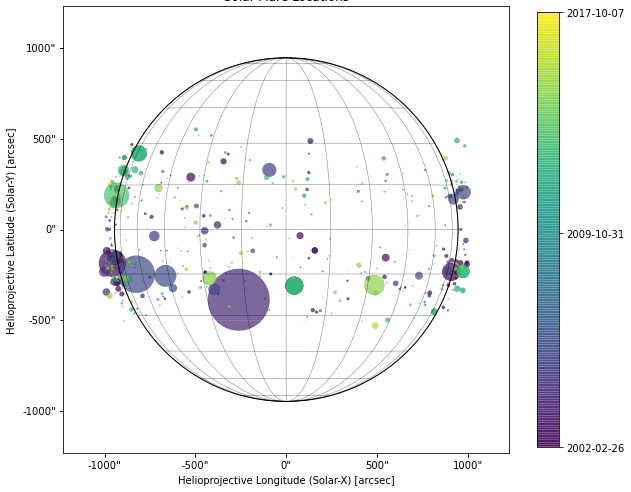

In [266]:
# Going to try with the sunmap
fig = plt.figure(figsize=[10,10], facecolor='white')
ax = fig.add_subplot(projection=sun)

sun.plot(cmap='Blues')
sun.data[:,:]=[500.]
sun.draw_limb(color='k')
sun.draw_grid(color='k', lw = 0.5)
ax.set_autoscale_on(False)
ax.set_title('Solar Flare Locations')

sct2 = ax.scatter(lons_f, lats_f, s=size_f, edgecolor='k', lw=0.1,
                  c=flare_dates, alpha=0.7, transform=ax.get_transform('world'))

cbar2 = fig.colorbar(sct2, orientation='vertical', shrink=0.8, 
                     ticks=[min(flare_dates), flare_dates[247], max(flare_dates)])
cbar2.ax.set_yticklabels(['2002-02-26', '2009-10-31', '2017-10-07'])

#plt.savefig('flare_locations.png', dpi=300, bbox_inches="tight", pad_inches=1)